# Advanced Features in Complexplorer

This notebook explores the advanced capabilities of complexplorer, including:

1. All colormap types and their uses
2. High-performance 3D visualization with PyVista
3. Riemann sphere projections
4. Domain composition and custom domains
5. STL export for 3D printing
6. Performance optimization techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Core imports - simplified!
import complexplorer as cp

# STL export (keeping separate as it's a specific submodule)
from complexplorer.export.stl import OrnamentGenerator, create_ornament

print("✓ All imports successful")

✓ All imports successful


## 1. Comprehensive Colormap Guide

Complexplorer offers various colormaps, each revealing different aspects of complex functions.

In [2]:
# Test function with interesting features
def f(z):
    return (z**3 - 1) / (z**3 + 1)

domain = cp.Rectangle(3, 3)

### Phase Portraits

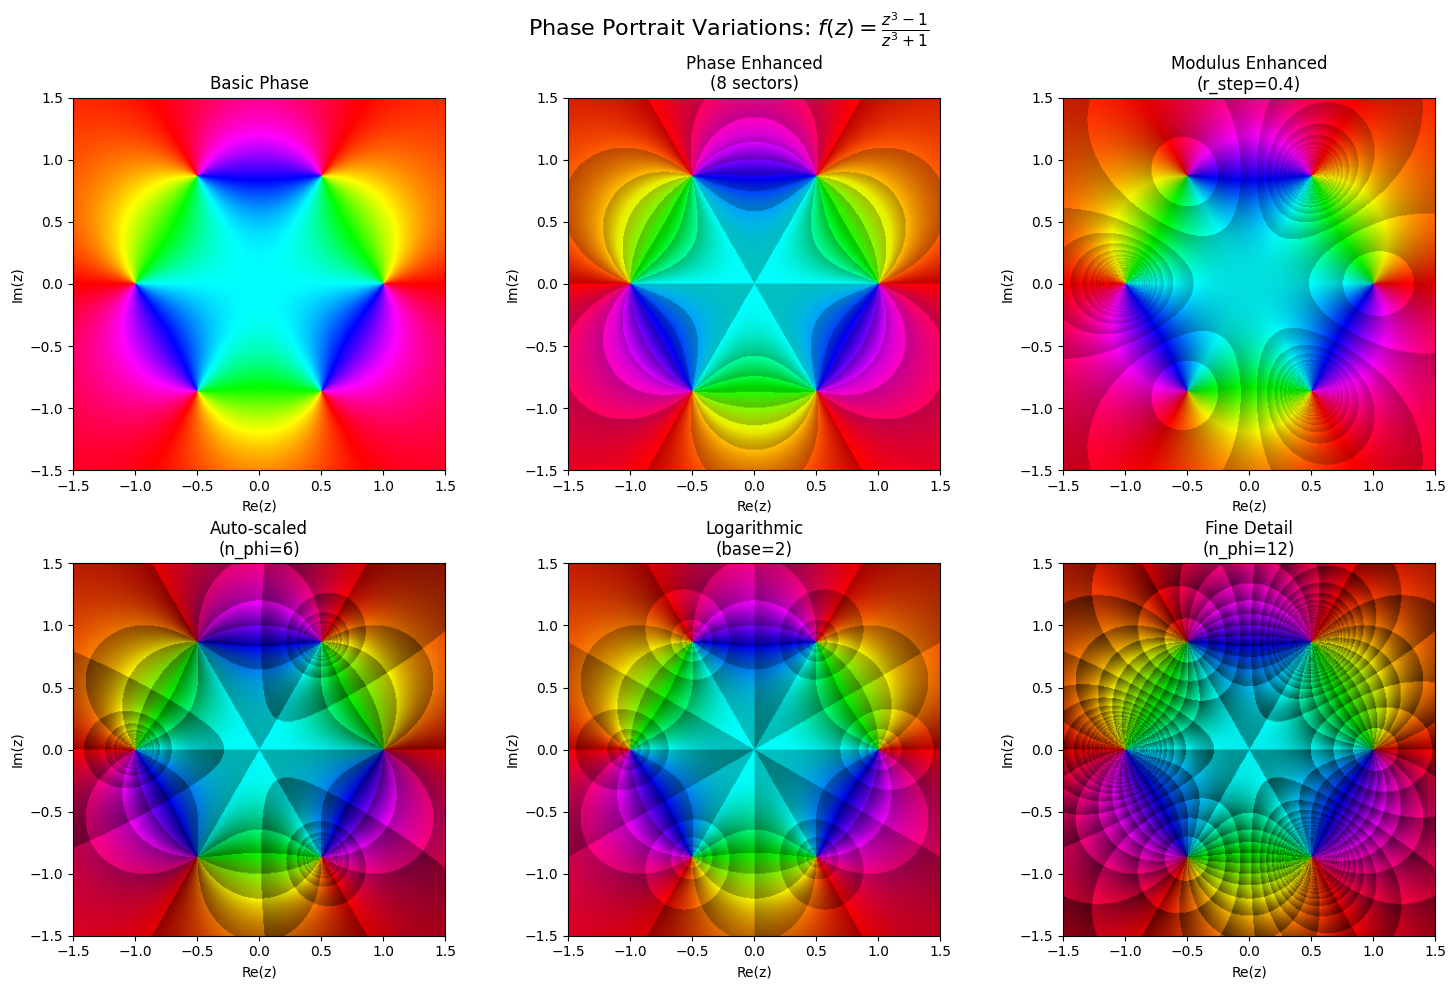

In [6]:
# Different phase portrait configurations
phase_configs = [
    ("Basic Phase", cp.Phase()),
    ("Phase Enhanced\n(8 sectors)", cp.Phase(n_phi=8)),
    ("Modulus Enhanced\n(r_step=0.4)", cp.Phase(r_linear_step=0.4, v_base=0.5)),
    ("Auto-scaled\n(n_phi=6)", cp.Phase(n_phi=6, auto_scale_r=True, v_base=0.4)),
    ("Logarithmic\n(base=2)", cp.Phase(n_phi=6, r_log_base=2.0, v_base=0.5)),
    ("Fine Detail\n(n_phi=12)", cp.Phase(n_phi=12, auto_scale_r=True, scale_radius=0.5, v_base=0.3))
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (title, cmap) in zip(axes, phase_configs):
    cp.plot(domain, func=f, cmap=cmap, ax=ax, resolution=400)
    ax.set_title(title)

plt.suptitle(r"Phase Portrait Variations: $f(z) = \frac{z^3 - 1}{z^3 + 1}$", fontsize=16)
plt.tight_layout()
plt.show()

### Chessboard Patterns

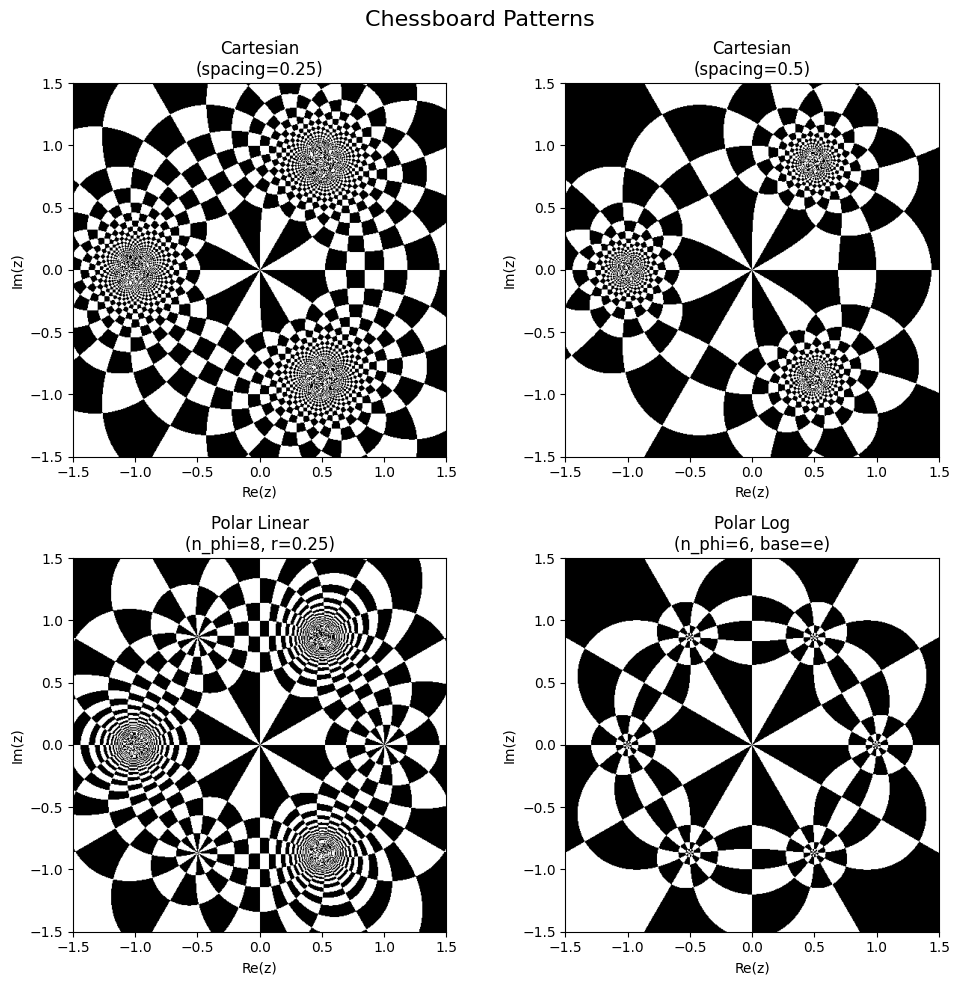

In [9]:
# Chessboard patterns show how functions transform grids
chessboard_configs = [
    ("Cartesian\n(spacing=0.25)", cp.Chessboard(spacing=0.25)),
    ("Cartesian\n(spacing=0.5)", cp.Chessboard(spacing=0.5)),
    ("Polar Linear\n(n_phi=8, r=0.25)", cp.PolarChessboard(n_phi=8, spacing=0.25)),
    ("Polar Log\n(n_phi=6, base=e)", cp.PolarChessboard(n_phi=6, r_log=np.e)),
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, (title, cmap) in zip(axes, chessboard_configs):
    cp.plot(domain, f, cmap=cmap, ax=ax, resolution=500)
    ax.set_title(title)

plt.suptitle("Chessboard Patterns", fontsize=16)
plt.tight_layout()
plt.show()

### Logarithmic Rings

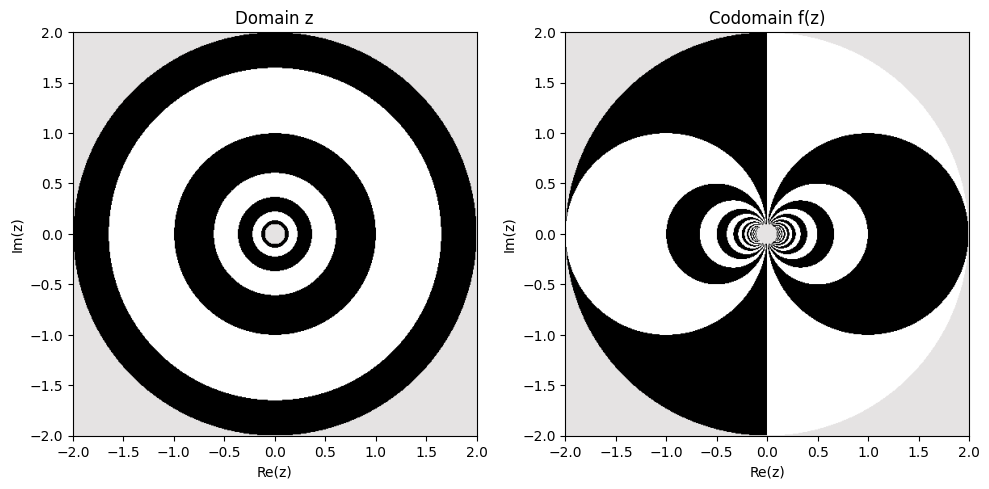

In [17]:
# Function with interesting magnitude behavior
g = lambda z: np.exp(1/z)

# Domain excluding origin
ann = cp.Annulus(0.1, 2.0)

cp.pair_plot(ann, func=g, cmap=cp.LogRings(log_spacing=0.5), resolution=500)
fig.suptitle(r"Logarithmic Rings: $f(z) = e^{1/z}$", fontsize=14)
plt.show()

## 2. High-Performance 3D with PyVista

PyVista provides stunning 3D visualizations that are 15-30x faster than matplotlib.

**Remember**: Always use `notebook=False` for high-quality output!

### 3D Landscapes

In [2]:
# Beautiful 3D landscape
print("Opening external window for high-quality 3D visualization...")

cp.plot_landscape_pv(
    domain=cp.Rectangle(3, 3),
    func=lambda z: (z**2 - 1) / (z**2 + 1),
    cmap=cp.Phase(n_phi=6, auto_scale_r=True, v_base=0.4),
    resolution=500,
    z_scale=0.4,
    z_max=5.0,
    notebook=False,  # External window for quality
    show=True
)

print("✓ Use mouse to interact: rotate, zoom, pan")
print("✓ Press 'q' to close the window")

Opening external window for high-quality 3D visualization...
✓ Use mouse to interact: rotate, zoom, pan
✓ Press 'q' to close the window


### Side-by-Side 3D Comparison

In [5]:
# Compare domain and codomain in 3D
print("Opening side-by-side 3D comparison...")

cp.pair_plot_landscape_pv(
    domain=cp.Disk(1.2),
    func=lambda z: z**3 - z,
    cmap=cp.PolarChessboard(n_phi=6, spacing=0.25),
    resolution=500,
    z_max=5,
    notebook=False,
    show=True
)

print("✓ Notice how the function transforms the polar grid")

Opening side-by-side 3D comparison...


/home/igork/projects/complexplorer/complexplorer/core/colormap.py:287: RuntimeWarning: invalid value encountered in cast
  angle_idx = np.floor((angle + np.pi) / self.phi).astype(int)
/home/igork/projects/complexplorer/complexplorer/core/colormap.py:294: RuntimeWarning: invalid value encountered in cast
  r_idx = np.floor(r).astype(int)


✓ Notice how the function transforms the polar grid


### Performance Comparison

In [23]:
import time

# Test function and domain
test_func = lambda z: np.sin(z) * np.exp(-abs(z)/4)
test_domain = cp.Rectangle(4, 4)
test_cmap = cp.Phase(n_phi=8, auto_scale_r=True)

# Time PyVista
print("Timing PyVista...")
start = time.time()
cp.plot_landscape_pv(
    test_domain, test_func, cmap=test_cmap, 
    resolution=500, notebook=False, show=False, off_screen=True
)
pyvista_time = time.time() - start

# Time matplotlib
print("Timing matplotlib...")
start = time.time()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cp.plot_landscape(test_domain, func=test_func, cmap=test_cmap, ax=ax, resolution=500)
plt.close()
matplotlib_time = time.time() - start

print(f"\nResults:")
print(f"PyVista: {pyvista_time:.2f}s")
print(f"Matplotlib: {matplotlib_time:.2f}s")
print(f"\n🚀 PyVista is {matplotlib_time/pyvista_time:.1f}x faster!")

Timing PyVista...
Timing matplotlib...

Results:
PyVista: 0.57s
Matplotlib: 4.81s

🚀 PyVista is 8.5x faster!


## 3. Riemann Sphere Projections

The Riemann sphere allows us to visualize the entire extended complex plane, including the point at infinity.

In [6]:
# Function with a pole - perfect for Riemann sphere
def rational_func(z):
    return (z**2 - 1) / (z**2 + 1)

print("Opening Riemann sphere visualization...")
print("This function has poles at z = ±i")

cp.riemann_pv(
    func=rational_func,
    resolution=500,
    cmap=cp.Phase(n_phi=8, auto_scale_r=True, v_base=0.4),
    modulus_mode='arctan',  # Good for functions with poles
    modulus_params={'r_min': 0.3, 'r_max': 0.9},
    notebook=False,
    show=True
)

print("\n✓ The poles appear as 'pinches' on the sphere")
print("✓ The point at infinity is at the north pole")

Opening Riemann sphere visualization...
This function has poles at z = ±i

✓ The poles appear as 'pinches' on the sphere
✓ The point at infinity is at the north pole


### Different Modulus Scaling Modes

In [ ]:
# Compare different modulus scaling modes
scaling_modes = ['constant', 'arctan', 'logarithmic', 'linear_clamp']

print("Comparing modulus scaling modes...")
print("(This will open 4 windows sequentially)\n")

for mode in scaling_modes:
    print(f"Showing {mode} scaling...")
    cp.riemann_pv(
        func=lambda z: z**3 - z,
        resolution=500,
        modulus_mode=mode,
        title=f"Modulus Scaling: {mode}",
        notebook=False,
        show=True
    )
    print(f"✓ {mode} scaling shown. Close window to continue.\n")

Comparing modulus scaling modes...
(This will open 4 windows sequentially)

Showing constant scaling...
✓ constant scaling shown. Close window to continue.

Showing arctan scaling...
✓ arctan scaling shown. Close window to continue.

Showing logarithmic scaling...
✓ logarithmic scaling shown. Close window to continue.

Showing linear_clamp scaling...
✓ linear_clamp scaling shown. Close window to continue.



## 4. Domain Composition

Create complex domains by combining simple ones.

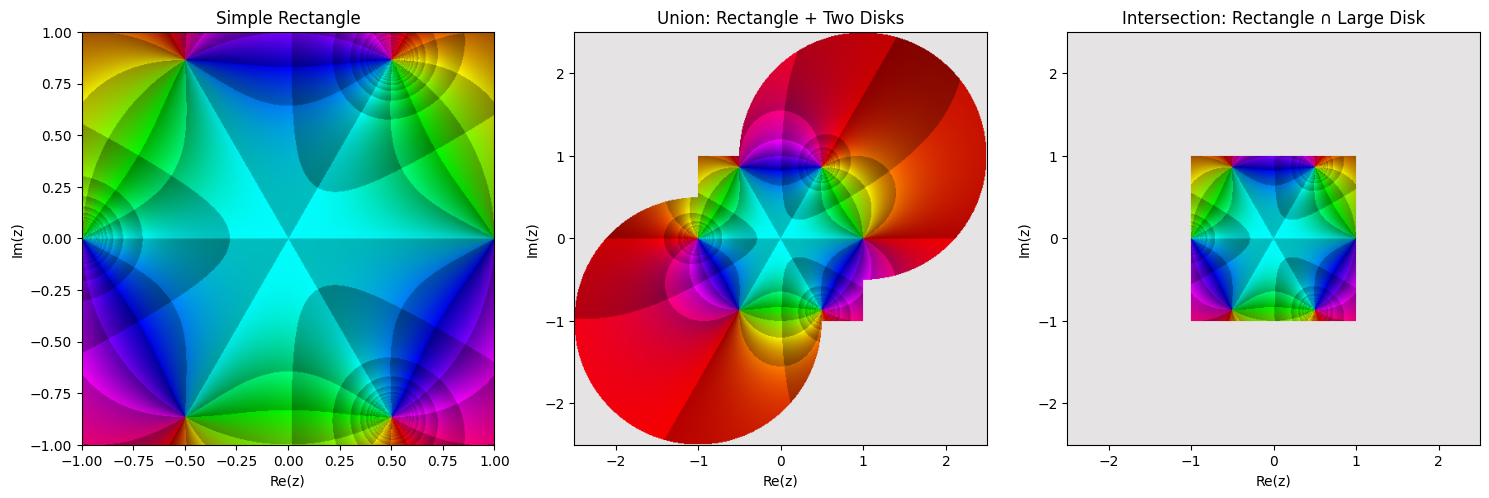

In [31]:
# Create interesting composite domains
rect = cp.Rectangle(2, 2)
disk1 = cp.Disk(1.5, center=-1-1j)
disk2 = cp.Disk(1.5, center=1+1j)

# Union: combine domains
union_domain = rect | disk1 | disk2

# Intersection: only overlapping regions
intersection_domain = rect & cp.Disk(2.5)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Simple rectangle
cp.plot(rect, f, ax=axes[0], resolution=500)
axes[0].set_title("Simple Rectangle")

# Union
cp.plot(union_domain, f, ax=axes[1], resolution=500)
axes[1].set_title("Union: Rectangle + Two Disks")

# Intersection
cp.plot(intersection_domain, f, ax=axes[2], resolution=500)
axes[2].set_title("Intersection: Rectangle ∩ Large Disk")

plt.tight_layout()
plt.show()

### Domain Restriction for Numerical Stability

In [33]:
# Function with essential singularity at origin
def exp_inv_z(z):
    return np.exp(1/z)

# Restrict domain to avoid singularity
safe_domain = cp.Annulus(0.2, 3.0)  # Exclude origin

# Visualize with 3D
print("Visualizing essential singularity with domain restriction...")

cp.plot_landscape_pv(
    domain=safe_domain,
    func=exp_inv_z,
    cmap=cp.Phase(n_phi=12, auto_scale_r=True, v_base=0.3),
    resolution=120,
    z_scale=0.3,
    notebook=False,
    show=True
)

print("\n✓ Domain restriction prevents numerical issues near z=0")

Visualizing essential singularity with domain restriction...

✓ Domain restriction prevents numerical issues near z=0


## 5. STL Export for 3D Printing

Transform your visualizations into physical objects!

In [9]:
# Function suitable for 3D printing
print_func = lambda z: (z**3 - 1) / (z**3 + 1)

# Create ornament generator
ornament = OrnamentGenerator(
    func=print_func,
    resolution=400,  # Balance quality vs file size
    scaling='arctan',  # Good for bounded output
    scaling_params={'r_min': 0.4, 'r_max': 0.9},
    cmap=cp.Phase(n_phi=8, auto_scale_r=True)
)

# Generate the ornament
print("Generating STL file...")
output_file = 'complex_ornament.stl'
ornament.generate_and_save(
    filename=output_file,
    size_mm=60,
    verbose=True
)

print(f"\n✓ STL file saved: {output_file}")

Generating STL file...
Generating Riemann sphere ornament:
  Resolution: 400
  Scaling: arctan
  Parameters: {'r_min': 0.4, 'r_max': 0.9}
  Generated mesh: 160000 vertices, 159201 faces
  Radius range: [0.402, 0.896]

Repairing mesh...
=== Simple Mesh Repair ===
Input: 160000 points, 159201 faces
Cleaning mesh...
  After clean: 159600 points, 159201 faces
Filling holes...
Initial boundary edges: 828
After filling: 828 boundary edges
Final: 159600 points, 159995 faces
✗ Mesh still has 828 boundary points
=== Mesh Validation Results ===
Watertight: False (825 boundary edges)
Manifold: False (825 non-manifold edges)
Dimensions: 56.257 x 60.000 x 50.010
Volume: 67905.022
Surface area: 8602.145

At 60mm size:
Estimated min wall thickness: 0.30mm
✗ Too thin! Recommend at least 160.0mm

=== Overall Assessment ===
✗ Mesh needs significant repair before printing

Saved STL file: complex_ornament.stl
File size: 15.22 MB

✓ STL file saved: complex_ornament.stl


## 6. Publication-Quality Figures

Create figures suitable for papers and presentations.

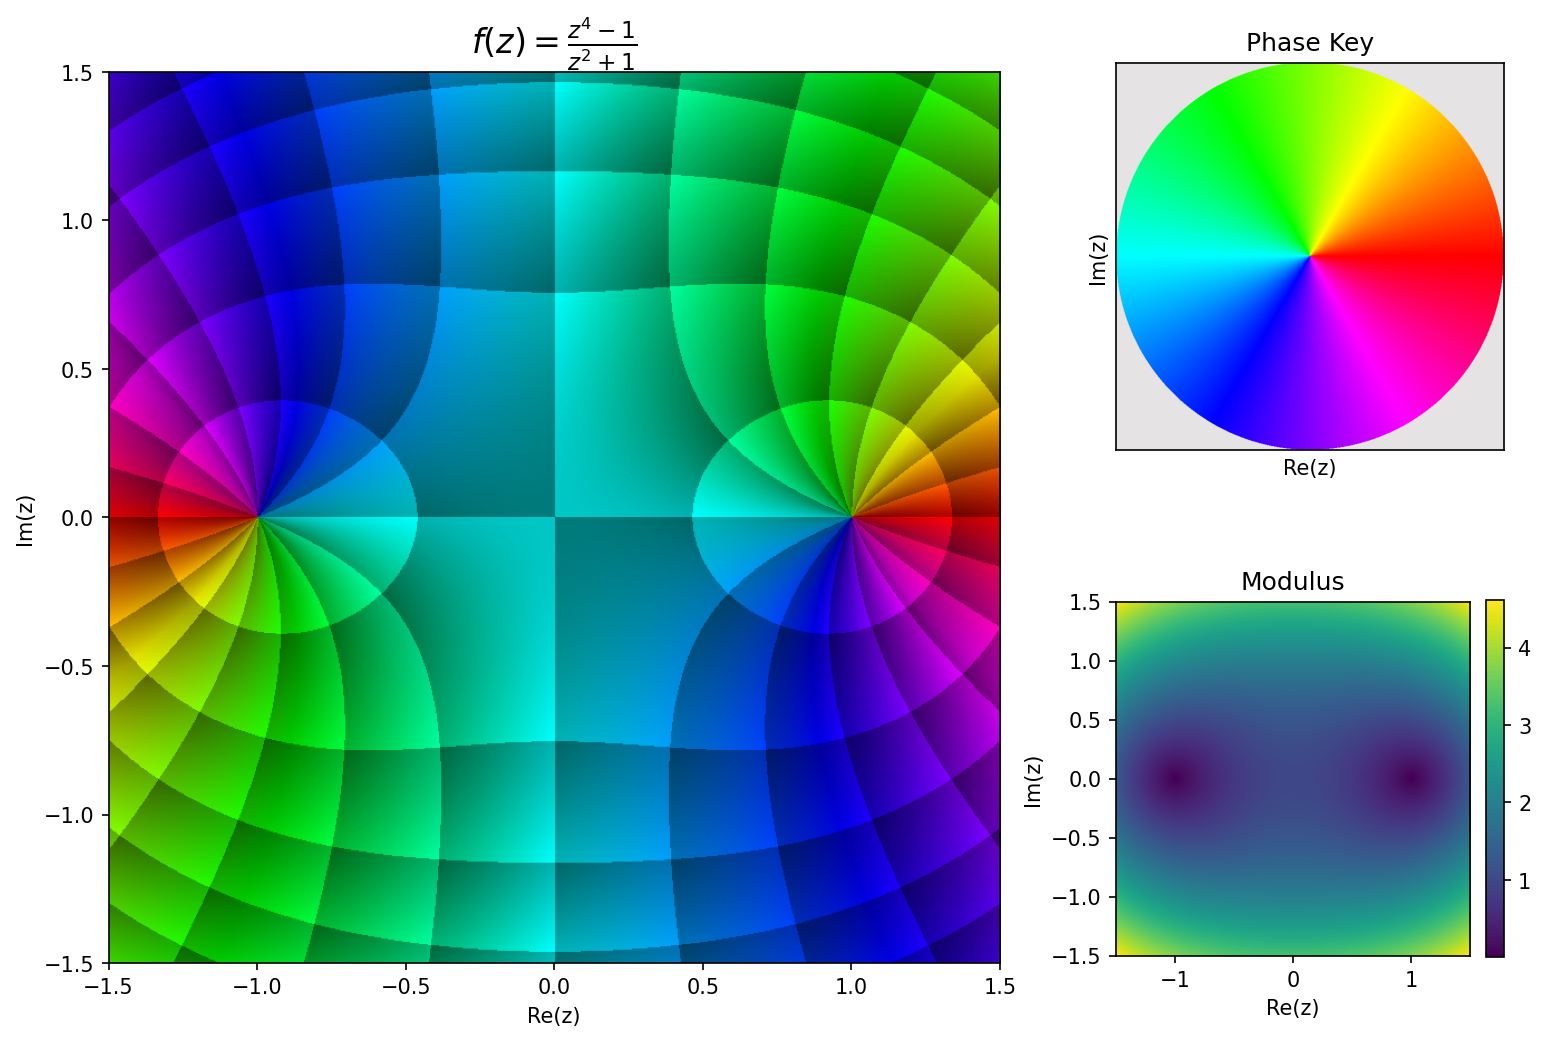

✓ Saved high-resolution PNG and PDF


In [12]:
# High-resolution figure with custom layout
fig = plt.figure(figsize=(12, 8), dpi=150)
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

# Main function display
ax_main = fig.add_subplot(gs[0:2, 0:2])
cp.plot(
    cp.Rectangle(3, 3),
    lambda z: (z**4 - 1) / (z**2 + 1),
    cmap=cp.Phase(n_phi=8, auto_scale_r=True, v_base=0.4),
    ax=ax_main,
    resolution=800  # High resolution
)
ax_main.set_title(r"$f(z) = \frac{z^4 - 1}{z^2 + 1}$", fontsize=16)

# Phase key
ax_key = fig.add_subplot(gs[0, 2])
cp.plot(
    cp.Disk(1),
    lambda z: z,
    cmap=cp.Phase(),
    ax=ax_key,
    resolution=800
)
ax_key.set_title("Phase Key", fontsize=12)
ax_key.set_xticks([])
ax_key.set_yticks([])

# Modulus plot
ax_mod = fig.add_subplot(gs[1, 2])
domain = cp.Rectangle(3, 3)
z = domain.mesh(500)
f_vals = (z**4 - 1) / (z**2 + 1)
mod = ax_mod.imshow(
    np.abs(f_vals), 
    extent=[-1.5, 1.5, -1.5, 1.5],
    cmap='viridis',
    origin='lower'
)
ax_mod.set_title("Modulus", fontsize=12)
ax_mod.set_xlabel("Re(z)")
ax_mod.set_ylabel("Im(z)")
plt.colorbar(mod, ax=ax_mod, fraction=0.046, pad=0.04)

# Save for publication
plt.savefig("publication_figure.png", dpi=300, bbox_inches='tight')
plt.savefig("publication_figure.pdf", bbox_inches='tight')  # Vector format
plt.show()

print("✓ Saved high-resolution PNG and PDF")

## Summary

You've explored:
1. ✓ All colormap types and their applications
2. ✓ High-performance 3D with PyVista (15-30x faster!)
3. ✓ Riemann sphere projections with modulus scaling
4. ✓ Domain composition for complex regions
5. ✓ STL export for 3D printing
6. ✓ Publication-quality figure creation

## Key Takeaways

- **Always use `notebook=False`** with PyVista for quality
- **Domain restriction** helps with numerical stability
- **Auto-scaled phase portraits** create visually pleasing square cells
- **Different colormaps** reveal different function properties
- **STL export** transforms math into physical objects

## Next Steps

Check out `api_cookbook.ipynb` for:
- Common function patterns and recipes
- Performance optimization strategies
- Best practices for different use cases